In [1]:
# 회귀 모델: K-최근접 이웃 회귀, 선형 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# 훈련 데이터와 테스트 데이터 나눠주는 거, 그리드 서치 (하이퍼파라미터 튜닝)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 창문해 때 지겹도록 썼던 matplotlib
import matplotlib.pyplot as plt

# numpy 배열, pandas, csv 리더
import numpy as np
import pandas as pd
import csv

In [3]:
# TODO: 여러분들에게 맞는 파일명, 인덱스로 바꾸세요.
filename = '2017.csv' # 파일 이름

# csv 파일의 대략적인 내용을 출력해줍니다.
data = pd.read_csv(filename)
data.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
# 위 표를 보고 숫자를 넣어주세요.
idx1 = 6 # 독립변수
idx2 = 2 # 종속변수

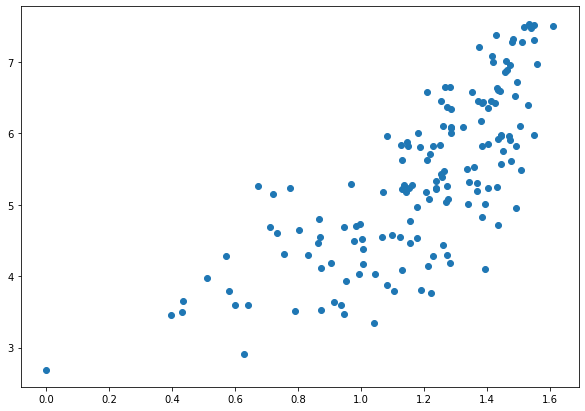

In [7]:
# 데이터 읽어오기 -> 시각화
x_data = []
y_data = []

with open(filename, 'r') as f:
    rdr = csv.reader(f) # 사람에 따라 delimiter='\t' 추가해야 하는 경우 있음
    next(rdr) # 헤더 제거
    
    for line in rdr:
        try:
          x_data.append(float(line[idx1]))
          y_data.append(float(line[idx2]))
        except:
          continue

plt.figure(figsize=(10,7))
plt.scatter(x_data, y_data)
plt.show()

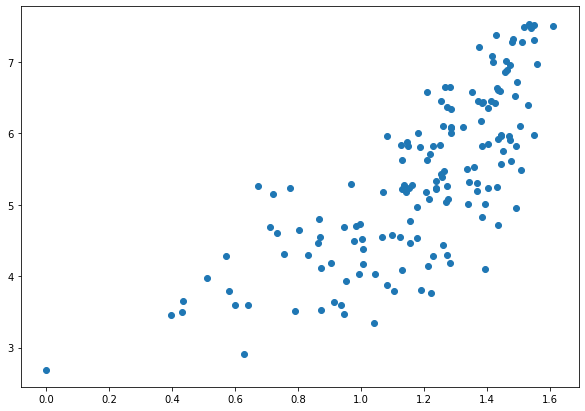

이렇게 편한 방법이 있는데 왜 노가다를 했나 싶죠?
가르치는 사람들의 흔한 변은 아마 다들 아실 거라 생각합니다.


In [9]:
# 좀 더 쉬운 방법으로 해봅시다.
x_data = data['Family'].to_numpy()
y_data = data['Happiness.Score'].to_numpy()

plt.figure(figsize=(10,7))
plt.scatter(x_data, y_data)
plt.show()

print(b'\xec\x9d\xb4\xeb\xa0\x87\xea\xb2\x8c \xed\x8e\xb8\xed\x95\x9c \xeb\xb0\xa9\xeb\xb2\x95\xec\x9d\xb4 \xec\x9e\x88\xeb\x8a\x94\xeb\x8d\xb0 \xec\x99\x9c \xeb\x85\xb8\xea\xb0\x80\xeb\x8b\xa4\xeb\xa5\xbc \xed\x96\x88\xeb\x82\x98 \xec\x8b\xb6\xec\xa3\xa0?'.decode('UTF-8'))
print(b'\xea\xb0\x80\xeb\xa5\xb4\xec\xb9\x98\xeb\x8a\x94 \xec\x82\xac\xeb\x9e\x8c\xeb\x93\xa4\xec\x9d\x98 \xed\x9d\x94\xed\x95\x9c \xeb\xb3\x80\xec\x9d\x80 \xec\x95\x84\xeb\xa7\x88 \xeb\x8b\xa4\xeb\x93\xa4 \xec\x95\x84\xec\x8b\xa4 \xea\xb1\xb0\xeb\x9d\xbc \xec\x83\x9d\xea\xb0\x81\xed\x95\xa9\xeb\x8b\x88\xeb\x8b\xa4.'.decode('UTF-8'))

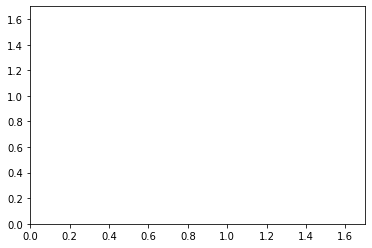

In [10]:
# 위 그래프를 보고, x값과 y값의 범위를 적절히 조절하여 비율이 1:1인 그래프를 만들어보세요.
# 1e6 = 1*10^6 = 1000000
# 1eN = 1*10^N = (0이 N개)

start = 0 # x값의 시작점
end = 1.7 # x값의 끝점

# x가 y보다 작을 때는 산점도가 나타나지 않습니다. 정상이에요.
plt.scatter(x_data, y_data)
plt.xlim((start, end))
plt.ylim((start, end))
plt.show()

## 키워드

특성: 데이터를 표현하는 성질feature (ex. 사람의 특성: 키, 몸무게, 혈액형, MBTI, ...)  
훈련: 머신러닝 알고리즘이 데이터에서 규칙을 찾는 과정 (사이킷런: fit() 메서드)  
모델: 알고리즘이 구현된 객체 (훈련시킨 결과)

훈련 세트와 데이터 세트의 분할  
샘플링 편향을 방지하기 위해 데이터를 잘 섞어주어야 함  
그렇지 않을 경우 엉뚱한 모델이 만들어질 위험이 있음  
  
## 훈련 세트와 데이터 세트의 분할

train_test_split(독립변수, 종속변수) -> 훈련입력, 테스트입력, 훈련타겟, 테스트타겟

In [12]:
# 회귀 분석 준비: 각 데이터를 넘파이 배열로 변환 및 세트 분리
train_input, test_input, train_target, test_target = train_test_split(
    x_data, y_data)

# 1d => 2d 변환
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [13]:
# n_param의 값을 조절해가며 점수를 확인하세요.
n_param = 50
knr = KNeighborsRegressor(n_neighbors=n_param)

# 인공지능 모델 학습: 출력결과는 학습 점수
# 여기서 오류가 뜰 경우, n_param의 작게(10~50) 값을 바꿔보세요.
knr.fit(train_input, train_target)
print(f'훈련 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')
print(f'테스트 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')

훈련 세트 정확도 : 53.345%
테스트 세트 정확도 : 53.345%


In [14]:
# K-최근접 이웃 회귀의 정확도를 높여볼까요?
for i in range(10, train_input.size, 30):
  knr = KNeighborsRegressor(n_neighbors=i)

  knr.fit(train_input, train_target)
  train_score = knr.score(train_input, train_target)
  test_score = knr.score(test_input, test_target)*100

  if train_score < 0 or test_score < 0:
    continue

  print(f'[i={i}] train, test: {train_score*100:.3f}%, {test_score*100:.3f}%')

print('=========================')
print(b'\xec\xa0\x80\xeb\x9f\xb0, \xec\x93\xb8\xeb\x8d\xb0\xec\x97\x86\xeb\x8a\x94 \xeb\x85\xb8\xea\xb0\x80\xeb\x8b\xa4\xeb\xa5\xbc \xed\x95\x98\xec\x85\xa8\xea\xb5\xb0\xec\x9a\x94!'
.decode('UTF-8'))

[i=10] train, test: 63.113%, 5324.822%
[i=40] train, test: 55.573%, 5622.437%
[i=70] train, test: 43.655%, 4381.791%
[i=100] train, test: 16.919%, 1438.427%
저런, 쓸데없는 노가다를 하셨군요!


In [15]:
import warnings
warnings.simplefilter("ignore", UserWarning)

# 그리드 서치를 통해 최적의 매개변수를 찾아봅시다.
params = { 'n_neighbors' : range(5, train_input.size, 1) }
gs = GridSearchCV(KNeighborsRegressor(), params, n_jobs=-1)
gs.fit(train_input, train_target)
print(gs.best_params_) # 최상의 매개변수

{'n_neighbors': 7}


In [16]:
# n_param을 해당 값으로 바꿔줍시다.
n_param = 7
knr = KNeighborsRegressor(n_neighbors=n_param)
knr.fit(train_input, train_target)
print(f'훈련 세트 정확도 : {knr.score(train_input, train_target)*100:.3f}%')
print(f'테스트 세트 정확도 : {knr.score(test_input, test_target)*100:.3f}%')

훈련 세트 정확도 : 67.617%
테스트 세트 정확도 : 54.664%


예측값: [6.99857146]


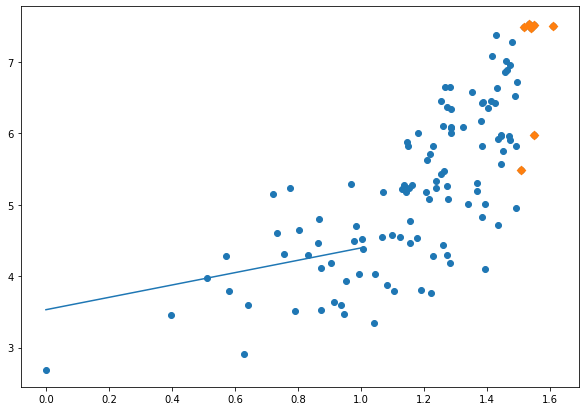

In [19]:
# 종속변수 추론하기
one = [[1.6]] # 독립변수 = x값
print(f'예측값: {knr.predict(one)}')
distances, indexes = knr.kneighbors(one)

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
# D
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
x = np.arange(start, end).reshape(-1, 1)
prediction = knr.predict(x)
plt.plot(x, prediction)
plt.show()

In [20]:
# 선형 회귀

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict(one))

[6.5461801]


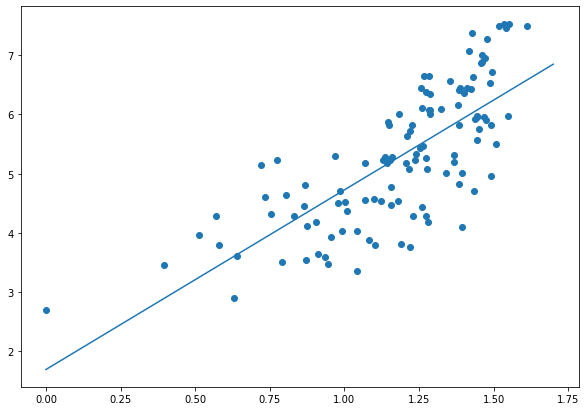

In [22]:
# coef_ = 가중치(w), intercept_ = 절편(b)
w = lr.coef_
b = lr.intercept_

plt.figure(figsize=(10,7))
plt.scatter(train_input, train_target)
plt.plot([start, end], [start*w+b, end*w+b])
plt.show()

In [26]:
# 비선형(다항) 회귀분석
train_poly = np.column_stack((train_input** 2, train_input))
test_poly = np.column_stack((test_input** 2, test_input))

print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[1.6**2, 1.6]]))

(116, 2) (39, 2)
[6.99326765]


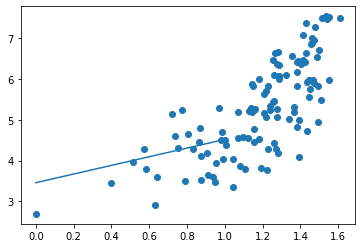

In [28]:
point = np.arange(start, end)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.show()